In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [6]:
df = pd.read_csv('../DATA/RSCCASN.csv',parse_dates=True,index_col='DATE')

In [9]:
df.columns = ['Sales']

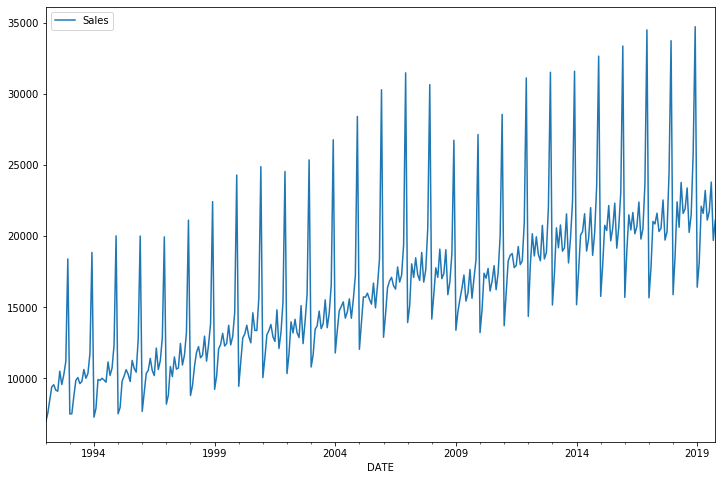

In [10]:
df.plot(figsize=(12,8))

In [11]:
len(df)

334

In [13]:
len(df) - 18

316

In [14]:
test_size = 18
test_ind = len(df) - test_size

In [15]:
train = df.iloc[:test_ind]
test = df.iloc[test_ind:]

In [16]:
train

,Sales
DATE,
1992-01-01,6938
1992-02-01,7524
1992-03-01,8475
1992-04-01,9401
1992-05-01,9558
...,...
2017-12-01,33720
2018-01-01,15881
2018-02-01,18585


In [17]:
test

,Sales
DATE,
2018-05-01,23764
2018-06-01,21589
2018-07-01,21919
2018-08-01,23381
2018-09-01,20260
2018-10-01,21473
2018-11-01,25831
2018-12-01,34706
2019-01-01,16410


In [18]:
from sklearn.preprocessing import MinMaxScaler

In [19]:
scaler = MinMaxScaler()

In [20]:
scaler.fit(train)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [21]:
scaled_train = scaler.transform(train)
scaled_test = scaler.transform(test)

In [24]:
scaled_train

array([[0.        ],
       [0.02127505],
       [0.05580163],
       [0.08942056],
       [0.09512053],
       [0.08146965],
       [0.07860151],
       [0.12979233],
       [0.09566512],
       [0.1203892 ],
       [0.15426227],
       [0.41595266],
       [0.02047633],
       [0.02127505],
       [0.06636654],
       [0.10633895],
       [0.11345484],
       [0.09791606],
       [0.10368864],
       [0.13396747],
       [0.11163956],
       [0.12372931],
       [0.17506535],
       [0.43250799],
       [0.0124165 ],
       [0.03499855],
       [0.10829945],
       [0.10641156],
       [0.11149434],
       [0.10728289],
       [0.10154662],
       [0.1531731 ],
       [0.11904589],
       [0.13767064],
       [0.19663085],
       [0.47480395],
       [0.02105722],
       [0.03714058],
       [0.10445106],
       [0.11726692],
       [0.13367703],
       [0.12209556],
       [0.10332559],
       [0.1570578 ],
       [0.13694453],
       [0.12710572],
       [0.21104415],
       [0.474

In [22]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

In [23]:
len(test)

18

In [49]:
length = 12
generator = TimeseriesGenerator(scaled_train,scaled_train,
                                length=length,batch_size=1)

In [46]:
X,y = generator[0]

In [47]:
len(X[0])

12

In [48]:
y

array([[0.02047633],
       [0.02127505],
       [0.06636654],
       [0.10633895]])

In [29]:
scaled_train

array([[0.        ],
       [0.02127505],
       [0.05580163],
       [0.08942056],
       [0.09512053],
       [0.08146965],
       [0.07860151],
       [0.12979233],
       [0.09566512],
       [0.1203892 ],
       [0.15426227],
       [0.41595266],
       [0.02047633],
       [0.02127505],
       [0.06636654],
       [0.10633895],
       [0.11345484],
       [0.09791606],
       [0.10368864],
       [0.13396747],
       [0.11163956],
       [0.12372931],
       [0.17506535],
       [0.43250799],
       [0.0124165 ],
       [0.03499855],
       [0.10829945],
       [0.10641156],
       [0.11149434],
       [0.10728289],
       [0.10154662],
       [0.1531731 ],
       [0.11904589],
       [0.13767064],
       [0.19663085],
       [0.47480395],
       [0.02105722],
       [0.03714058],
       [0.10445106],
       [0.11726692],
       [0.13367703],
       [0.12209556],
       [0.10332559],
       [0.1570578 ],
       [0.13694453],
       [0.12710572],
       [0.21104415],
       [0.474

In [50]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,LSTM

In [52]:
n_features = 1

In [61]:
model = Sequential()

model.add(LSTM(100,activation='relu',input_shape=(length,n_features)))

model.add(Dense(1))

model.compile(optimizer='adam',loss='mse')

In [55]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 100)               40800     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 101       
Total params: 40,901
Trainable params: 40,901
Non-trainable params: 0
_________________________________________________________________


In [56]:
from tensorflow.keras.callbacks import EarlyStopping

In [62]:
early_stop = EarlyStopping(monitor='val_loss',mode='min',patience=3)

In [63]:
validation_generator = TimeseriesGenerator(scaled_test,scaled_test,
                                           length=length,batch_size=1)

In [64]:
model.fit_generator(generator,validation_data=validation_generator,epochs=100,
                   callbacks=[early_stop])

Epoch 1/100
304/304 [==============================] - 7s 23ms/step - loss: 0.0231 - val_loss: 0.0028
Epoch 2/100
304/304 [==============================] - 8s 25ms/step - loss: 0.0155 - val_loss: 0.0016
Epoch 3/100
304/304 [==============================] - 8s 25ms/step - loss: 0.0077 - val_loss: 0.0058
Epoch 4/100
304/304 [==============================] - 7s 23ms/step - loss: 0.0031 - val_loss: 0.0019
Epoch 5/100
304/304 [==============================] - 7s 23ms/step - loss: 0.0023 - val_loss: 0.0011
Epoch 6/100
304/304 [==============================] - 7s 23ms/step - loss: 0.0023 - val_loss: 5.1144e-04
Epoch 7/100
304/304 [==============================] - 7s 24ms/step - loss: 0.0019 - val_loss: 0.0010
Epoch 8/100
304/304 [==============================] - 7s 23ms/step - loss: 0.0012 - val_loss: 3.1801e-04
Epoch 9/100
304/304 [==============================] - 7s 23ms/step - loss: 0.0012 - val_loss: 0.0062
Epoch 10/100
304/304 [==============================] - 7s 23ms/step - los

In [65]:
losses = pd.DataFrame(model.history.history)

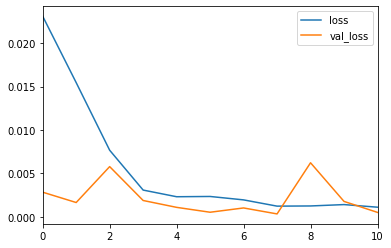

In [66]:
losses.plot()

In [69]:
test_predictions = []

first_eval_batch = scaled_train[-length:]
current_batch = first_eval_batch.reshape(1,length,n_features)

for i in range(len(scaled_test)):
    
    current_pred = model.predict(current_batch)[0]
    
    test_predictions.append(current_pred)
    
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

In [70]:
true_predictions = scaler.inverse_transform(test_predictions)

In [71]:
test['Predictions'] = true_predictions

H:\H Program Files\Anaconda3\envs\tf2py37\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


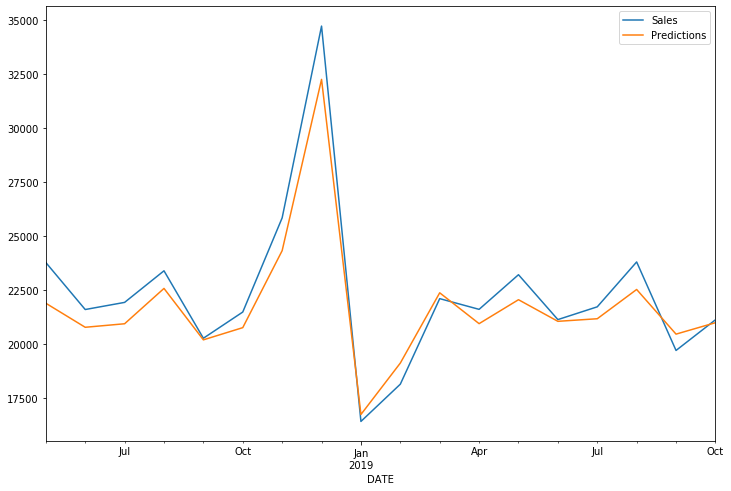

In [74]:
test.plot(figsize=(12,8))

In [75]:
full_scaler = MinMaxScaler()

In [76]:
full_scaled_data = full_scaler.fit_transform(df)

In [77]:
length = 12

generator = TimeseriesGenerator(full_scaled_data,full_scaled_data,
                                length=length,batch_size=1)

In [78]:
model = Sequential()

model.add(LSTM(100,activation='relu',input_shape=(length,n_features)))

model.add(Dense(1))

model.compile(optimizer='adam',loss='mse')

In [79]:
model.fit_generator(generator,epochs=7)

Epoch 1/7
322/322 [==============================] - 8s 24ms/step - loss: 0.0243
Epoch 2/7
322/322 [==============================] - 7s 23ms/step - loss: 0.0179
Epoch 3/7
322/322 [==============================] - 8s 25ms/step - loss: 0.0109
Epoch 4/7
322/322 [==============================] - 9s 26ms/step - loss: 0.0039
Epoch 5/7
322/322 [==============================] - 8s 25ms/step - loss: 0.0028
Epoch 6/7
322/322 [==============================] - 9s 28ms/step - loss: 0.0023
Epoch 7/7
322/322 [==============================] - 8s 26ms/step - loss: 0.0021


In [93]:
forecast = []

# 1200 months into the future (100 years)
periods = 24

first_eval_batch = full_scaled_data[-length:]
current_batch = first_eval_batch.reshape(1,length,n_features)

for i in range(periods):
    
    current_pred = model.predict(current_batch)[0]
    
    forecast.append(current_pred)
    
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

In [94]:
forecast = scaler.inverse_transform(forecast)

In [95]:
forecast_index = pd.date_range(start='2019-11-01',periods=periods,
                             freq='MS')

In [96]:
forecast_index

DatetimeIndex(['2019-11-01', '2019-12-01', '2020-01-01', '2020-02-01',
               '2020-03-01', '2020-04-01', '2020-05-01', '2020-06-01',
               '2020-07-01', '2020-08-01', '2020-09-01', '2020-10-01',
               '2020-11-01', '2020-12-01', '2021-01-01', '2021-02-01',
               '2021-03-01', '2021-04-01', '2021-05-01', '2021-06-01',
               '2021-07-01', '2021-08-01', '2021-09-01', '2021-10-01'],
              dtype='datetime64[ns]', freq='MS')

In [97]:
forecast_df = pd.DataFrame(data=forecast,index=forecast_index,columns=['Forecast'])

(576, 611)

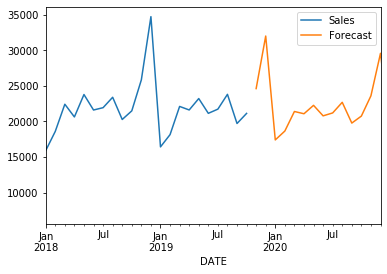

In [100]:
ax = df.plot()
forecast_df.plot(ax=ax)
plt.xlim('2018-01-01','2020-12-01')